In [4]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [5]:
X,y = load_diabetes(return_X_y = True)
df = pd.DataFrame(X)

# Feature Scaling
X = X - X.mean() / X_Range

In [6]:
# Feature Scaling
# print((X[:,0] - X[:,0].mean())/(X[:,0].max() - X[:,0].min()))
X_mean = df[:].mean().values.reshape(1,10)
X_new = X - X_mean
df = pd.DataFrame(X_new)
X_max = df[:].max()
X_min = df[:].min()
X_range = (X_max - X_min).values
X_new = X_new/X_range.reshape(1,10)
X = X_new
# print(X_new[:,0])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
import matplotlib.pyplot as plt

In [9]:
class GDRegressor:
    def __init__(self,epochs=100,lr=0.001):
        self.epochs = epochs
        self.lr = lr
        self.coef_ = None
        self.intercept_ = None
    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        x_axis = []
        costs = []
        for _ in range(self.epochs):
            y_pred = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = np.mean(y_pred - y_train)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            coef_der = np.dot(X_train.T,(y_pred - y_train)) / X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
            cost = np.dot((y_pred - y_train).T, (y_pred-y_train)) / (2 * X_train.shape[0])
            x_axis.append(_)
            costs.append(cost)
        plt.plot(x_axis,costs)
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

0.44279020396098645

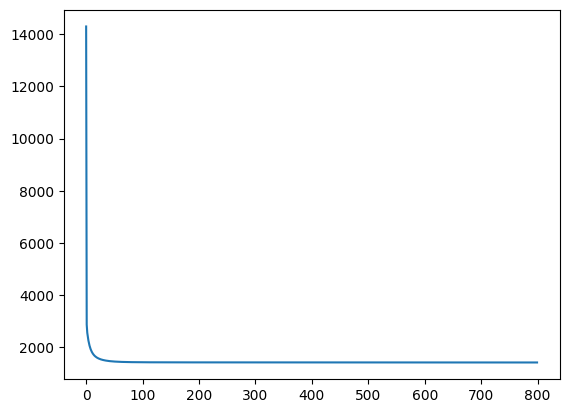

In [10]:
gdr = GDRegressor(epochs = 800, lr = 0.9)
gdr.fit(X_train,y_train)
y_pred = gdr.predict(X_test)
r2_score(y_test,y_pred)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X_org, y_org = data.data, data.target

In [13]:
def applyMeanNormalization(X_real):
    X_mean = np.mean(X_real, axis=0)
    X_max = np.max(X_real, axis=0)
    X_min = np.min(X_real, axis=0)
    return (X_real - X_mean) / (X_max - X_min)


In [14]:
X, y = applyMeanNormalization(X_org), applyMeanNormalization(y_org)
print(np.max(np.max(X, axis=0) - np.min(X, axis=0)))
print(np.max(X, axis=0) , np.min(X, axis=0))


1.0
[0.76753624 0.45804929 0.96751205 0.97737129 0.96013126 0.99808605
 0.67142812 0.52387495] [-0.23246376 -0.54195071 -0.03248795 -0.02262871 -0.03986874 -0.00191395
 -0.32857188 -0.47612505]


In [116]:
# Plot the graphs against each feature to see the distrubution of the data. Check if the data is linearly distributed or not
# for i in range(0,8):
#     plt.subplot(4,2,i+1)
#     plt.scatter(X[:,i],y)
#     plt.show()

In [15]:
print(y.shape[0])

20640


In [16]:
class GradinentDes:
    def __init__(self, lr = 0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        cost = []
        for i in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            interceptDer = np.mean(y_hat - y_train)
            self.intercept_ = self.intercept_ - interceptDer * self.lr
            coef_der = np.dot(y_hat - y_train, X_train) / y_train.shape[0]
            self.coef_ = self.coef_ - self.lr * coef_der
            cost.append((1 / (2 * X_train.shape[0])) * np.dot((y_hat - y_train).T, (y_hat-y_train)))
        
        plt.plot(np.arange(0, self.epochs), cost)
        plt.show()
        return (self.coef_, self.intercept_)
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)


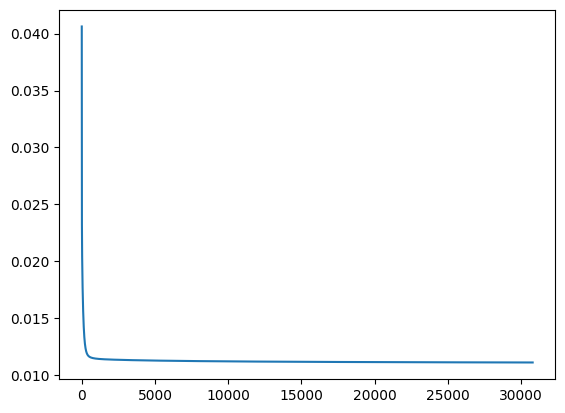

(array([ 1.24622672,  0.09711415, -1.99769624,  2.87160693, -0.04331359,
        -0.98806939, -0.83045613, -0.90775175]),
 -7.144829945615949e-05)

In [18]:
gdr = GradinentDes(2, 30800)
gdr.fit(X_train, y_train)

In [19]:
y_pred = gdr.predict(X_test)
r2_score(y_test, y_pred)

0.6010181133211345

0.5929558942892266

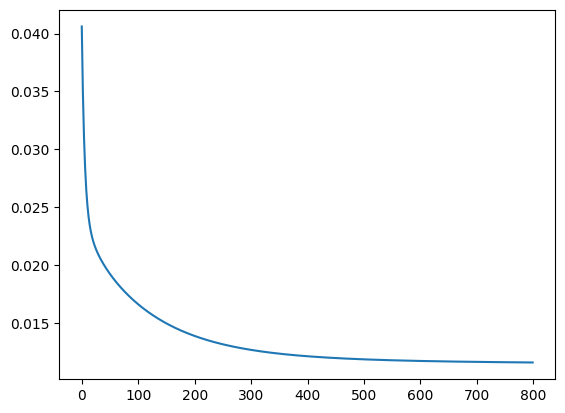

In [173]:
gdrPrev = GDRegressor(800,1.5)
gdrPrev.fit(X_train, y_train)
y_pred = gdrPrev.predict(X_test)
r2_score(y_test, y_pred)

In [216]:
# Use Sk learn Liinar Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
sklr = LinearRegression()
sklr.fit(X_train, y_train)
y_pred = sklr.predict(X_test)
r2_score(y_test,y_pred)

0.6013853272055152

In [220]:
# Use SGd Regression

In [22]:
import time

In [53]:
t0,t1=5,50

In [54]:

def learning_rate(t):
    return t0 / (t + t1)

In [55]:
class SGradinentDes:
    def __init__(self, lr = 0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        cost = []
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                self.lr = learning_rate(i * X_train.shape[0] + j)
                idx = np.random.randint(0,X_train.shape[0])
                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_
                interceptDer = y_hat - y_train[idx]
                self.intercept_ = self.intercept_ - interceptDer * self.lr
                coef_der = np.dot(y_hat - y_train[idx], X_train[idx]) / y_train.shape[0]
                self.coef_ = self.coef_ - self.lr * coef_der
                cost.append((1 / (2 * X_train.shape[0])) * np.dot((y_hat - y_train[idx]).T, (y_hat-y_train[idx])))
        
        plt.plot(np.arange(0,len(cost)), cost)
        plt.show()
        return (self.coef_, self.intercept_)
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

(16512, 8) (16512,)


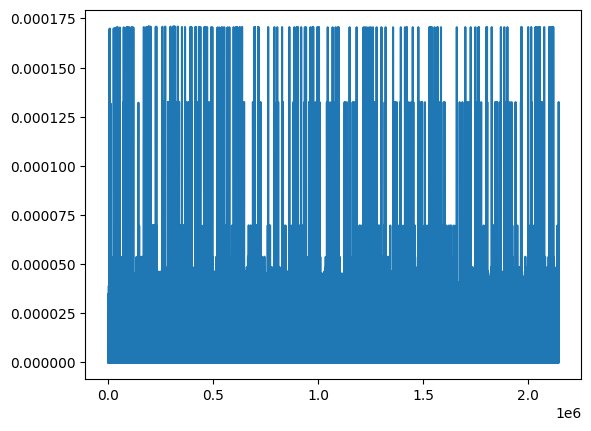

-0.43540450904107675

In [56]:
sgd = SGradinentDes(0.1, 130)
print(X_train.shape, y_train.shape)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
r2_score(y_test, y_pred)